In [3]:
%matplotlib inline

In [7]:
import pandas as pd
from os.path import exists
import numpy as np
import seaborn as sns
from helper_functions import *
import matplotlib.pylab as plt

### Processing Data

Process the data so that it can be visualized nicely.

In [8]:
occ_list = import_occupations("data/occupations_updated.csv")
frame = pd.DataFrame(columns=['occupation', 'total', 'male', 'female'])
total_frame = pd.DataFrame()
for occupation in occ_list:
        name = occupation[0]
        occ_file = 'data/dataframes_cleaned/' + name + '.csv'
        df = pd.read_csv(occ_file)
        #count amount of each gender
        values = df['gender'].value_counts()
        dic = {'occupation' : name, 'total' : [len(df)]}
        for gender, amount in values.iteritems():
                dic[gender] = [amount]
        frame2 = pd.DataFrame.from_dict(dic)
        frame = pd.concat([frame, frame2], ignore_index=True, axis=0)
        #add occupation column to original df and append to a big df with all data
        df['occupation'] = name
        total_frame = pd.concat([total_frame, df], ignore_index=True)
frame = frame.fillna(0)
#print(frame)
frame['occupation'].to_csv('data/occupations.csv', index=False)
frame[['occupation', 'total']].to_csv('data/occupations_total.csv')

In [9]:
sorted = frame.sort_values(by=['total'], ignore_index=True)
reduced = sorted[sorted['total'] >= 2500]
print(reduced.reset_index(drop=True))
reduced['occupation'].to_csv('data/occupations_reduced.csv', index=False)

          occupation  total   male  female  diverse
0   fashion_designer   2864   1248    1604     12.0
1      industrialist   2923   2874      49      0.0
2         cartoonist   3163   2487     662     14.0
3         magistrate   3281   3073     208      0.0
4              nurse   3303    305    2990      8.0
5          policeman   4043   3680     361      2.0
6              coach   4310   3849     460      1.0
7           wrestler   4426   3520     898      8.0
8          violinist   5284   3958    1323      3.0
9          geologist   6248   5681     567      0.0
10          lyricist   6745   5498    1241      6.0
11   cinematographer   6928   6418     509      1.0
12            dancer   7795   2983    4782     30.0
13            banker   7805   7446     359      0.0
14             boxer  12282  11431     848      3.0
15            farmer  12316  10515    1800      1.0
16         guitarist  13511  12410    1086     15.0
17         sportsman  14600  11541    3057      2.0
18          

Visualize the total amount of datapoints for each occupation to emphasize where the most data is accessible.

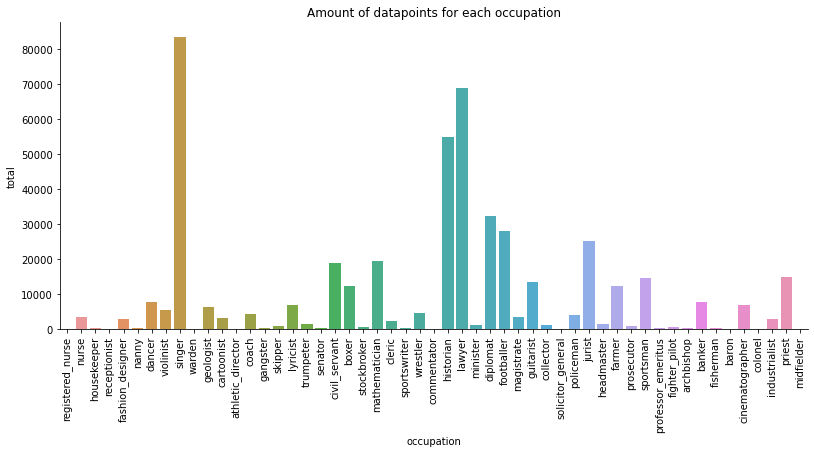

In [10]:
graph = sns.catplot(data=frame, x='occupation', y='total', kind='bar', aspect=7/3)
plt.title('Amount of datapoints for each occupation')
plt.xticks(rotation=90)
plt.show()

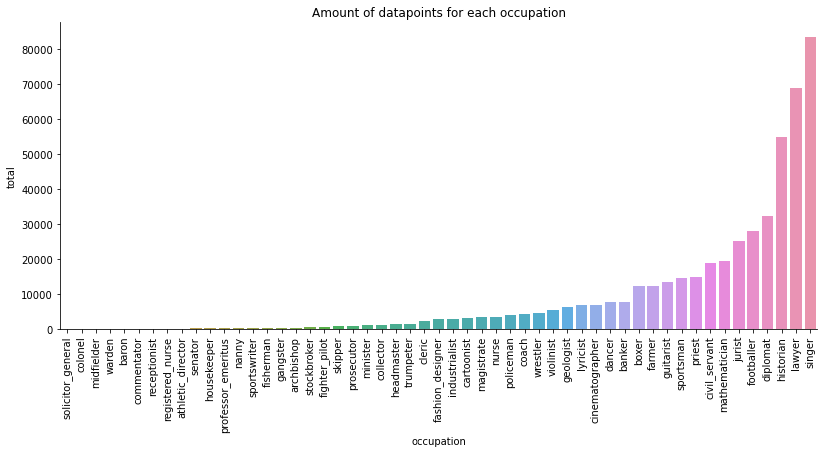

In [11]:
#distribution of datapoints
graph = sns.catplot(data=frame.sort_values(by=['total']), x='occupation', y='total', kind='bar', aspect=7/3)
plt.title('Amount of datapoints for each occupation')
plt.xticks(rotation=90)
plt.show()

Visualize the distribution of the genders for each occupation. This gives a first impression of gender distributions in each occupation based on real/historical context.

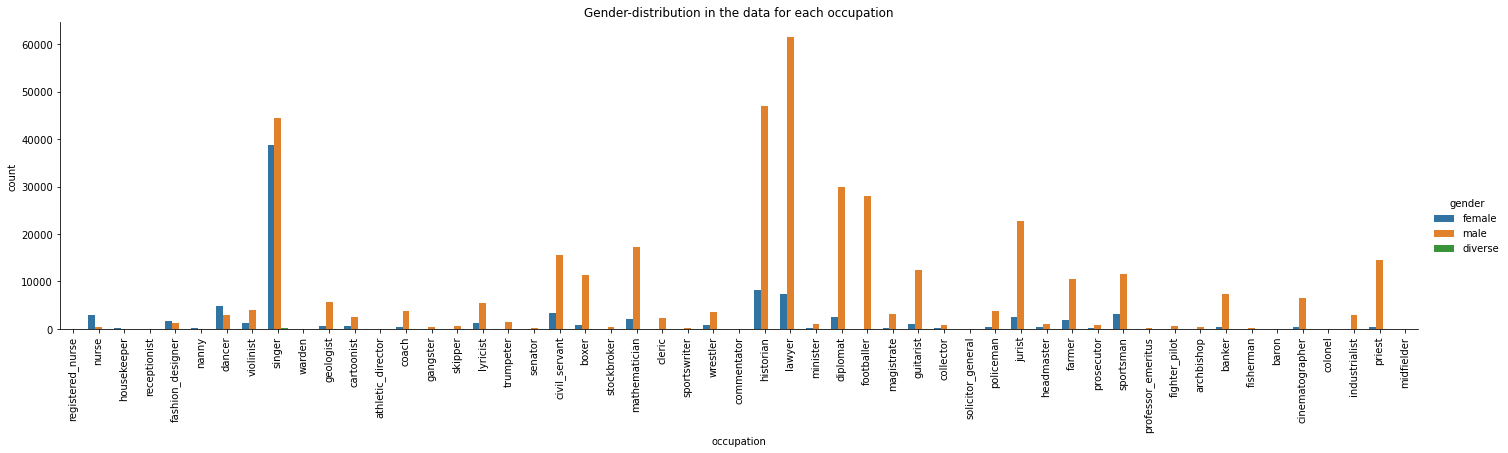

In [12]:
sns.catplot(data=total_frame, x='occupation', hue='gender', kind='count', aspect=4/1)
plt.title('Gender-distribution in the data for each occupation')
plt.xticks(rotation=90)
plt.show()

### Find deleted Occupations (from processing)

In [13]:
occ_list_old = import_occupations("data/occupations_original.csv")
for occ in occ_list_old:
    if occ not in occ_list:
        print(occ)

['counselor' 'Q5783638']
['sergeant' 'Q157696']
['marshal' 'Q15879178']
['infielder' 'Q1147776']
['actor' 'Q33999']
['goalkeeper' 'Q201330']
